In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_json('../data/Archive_Sofia_stations_RAW.json')
df.columns = df.iloc[0] # set first row as header
df = df.iloc[1: , :] # drop first row
df

,timest,station,param,level,isinvalid
1,2016-01-20 16:00:00,1,1,81.79,0
2,2016-01-20 16:00:00,2,1,106.47,0
3,2016-01-20 16:00:00,3,1,121.81,0
4,2016-01-20 16:00:00,4,1,140.35,0
5,2016-01-20 16:00:00,5,1,25.27,0
...,...,...,...,...,...
1252194,2018-06-19 10:00:00,5,10,0,0
1252195,2018-06-19 10:00:00,5,11,0,0
1252196,2018-06-19 10:00:00,6,9,0,0
1252197,2018-06-19 10:00:00,6,10,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252198 entries, 1 to 1252198
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   timest     1252198 non-null  object
 1   station    1252198 non-null  object
 2   param      1252198 non-null  object
 3   level      1252198 non-null  object
 4   isinvalid  1252198 non-null  object
dtypes: object(5)
memory usage: 47.8+ MB


No NaN values in the dataset.

In [69]:
df.value_counts(['isinvalid'])

isinvalid
0            1241655
1              10543
dtype: int64

There are 10543 invalid measures, which should be dropped.

In [70]:
df = df[df['isinvalid'] == '0']
df

,timest,station,param,level,isinvalid
1,2016-01-20 16:00:00,1,1,81.79,0
2,2016-01-20 16:00:00,2,1,106.47,0
3,2016-01-20 16:00:00,3,1,121.81,0
4,2016-01-20 16:00:00,4,1,140.35,0
5,2016-01-20 16:00:00,5,1,25.27,0
...,...,...,...,...,...
1252194,2018-06-19 10:00:00,5,10,0,0
1252195,2018-06-19 10:00:00,5,11,0,0
1252196,2018-06-19 10:00:00,6,9,0,0
1252197,2018-06-19 10:00:00,6,10,0,0


In [71]:
station_group_count = df.groupby('station')['station'].count()
station_group_count

station
1    220924
2    173653
3    229873
4    229104
5    201100
6    187001
Name: station, dtype: int64

<BarContainer object of 6 artists>

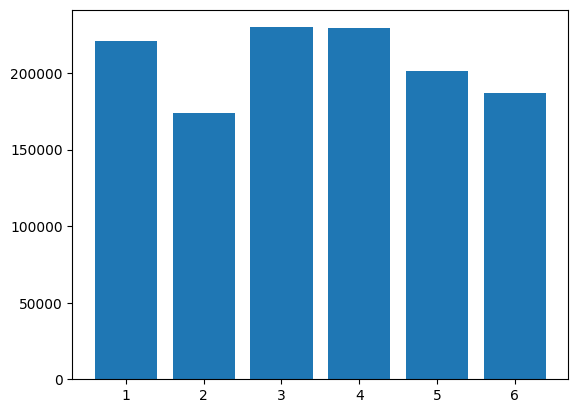

In [72]:
plt.bar(list(station_group_count.index), list(station_group_count.values))

There is less information for stations 2 and 6 compared to the other stations.

In [73]:
station_param_group = df.groupby(['station', 'param']).size()
df['param'].astype(int)
station_param_group

station  param
1        0        19190
         1        20750
         10       20008
         11       20011
         2        20773
                  ...  
6        3        16446
         4        19205
         6        19081
         7        19299
         9        19563
Length: 66, dtype: int64

In [74]:
station_param_df = station_param_group.unstack(level=0)
station_param_df

station,1,2,3,4,5,6
param,,,,,,
0,19190.0,17599.0,19205.0,18869.0,17547.0,18885.0
1,20750.0,18921.0,19626.0,18650.0,17372.0,17789.0
10,20008.0,19850.0,19571.0,19576.0,19346.0,19498.0
11,20011.0,19839.0,19574.0,19576.0,19350.0,19499.0
2,20773.0,18982.0,19587.0,18583.0,17360.0,17736.0
3,16125.0,NaN,18791.0,17833.0,9051.0,16446.0
4,NaN,NaN,19282.0,19112.0,17335.0,19205.0
5,20689.0,19480.0,19634.0,19268.0,16735.0,NaN
6,20772.0,19448.0,19624.0,19319.0,17369.0,19081.0


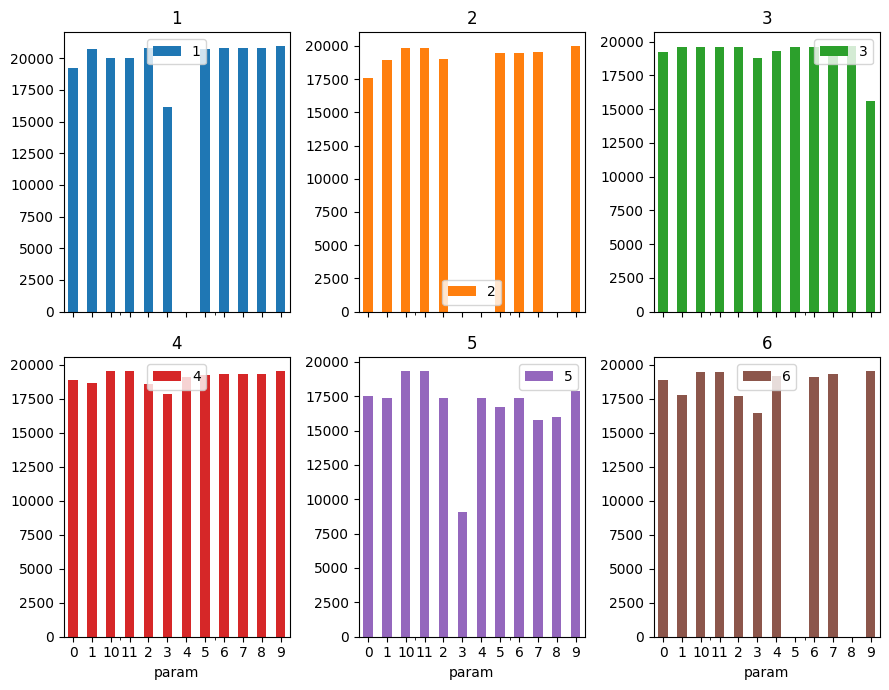

In [75]:
station_param_df.plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.tight_layout()

There is no information on:

- station 1 - parameter 4
- station 2 - parameter 3, 4, 8
- station 6 - parameter 5, 8


There is less information on parameter 3, measured at station 5.

In [76]:
df["timest"].min(), df["timest"].max()

('2016-01-20 16:00:00', '2018-06-19 10:00:00')

The data is measured between 20.01.2016 and 19.06.2018.

In [77]:
df.groupby('timest')['timest'].count().value_counts()

63    3363
65    3347
64    3188
66    3000
62    2524
56     904
8      879
57     680
61     660
60     482
55     401
59     379
58     216
28     116
54     103
7      100
27      95
53      94
29      71
17      69
18      62
16      54
51      39
49      32
50      29
45      22
19      21
52      16
24      10
48       8
47       8
14       4
26       3
15       3
4        3
38       2
23       2
11       2
31       1
40       1
25       1
43       1
46       1
33       1
13       1
39       1
6        1
22       1
41       1
Name: timest, dtype: int64